In [1]:
from app import create_app
from app.instrument import Instrument
from app.analysis import Quote
with create_app().app_context():
    provided = ['VOO']
    quote = Quote([b.symbol for b in Instrument.find_bonds()] + provided, 120)
f'from {quote.start.date()} to {quote.end.date()}'

'from 2019-02-20 to 2019-06-20'

In [2]:
stat = quote.statistics(21)
stat = stat[stat['drawdown'] < 0.3]
stat

,21-len,21-mean,21-std,21-shrp,drawdown
symbol,,,,,
MINT,64,0.297293,0.028079,4.652154,0.019691
SHV,64,0.221117,0.032083,1.697169,0.018119
VCSH,64,0.677296,0.362513,1.408584,0.282492
VGSH,64,0.507265,0.267127,1.275043,0.222220
SHY,64,0.485862,0.257846,1.237928,0.209406


In [3]:
stat = quote.statistics(21)
stat = stat[(stat['drawdown'] < 2) & (stat['21-mean'] > 0.4)]
stat

,21-len,21-mean,21-std,21-shrp,drawdown
symbol,,,,,
VTEB,64,1.047696,0.382665,2.302348,0.333008
MUB,64,1.028343,0.380882,2.262317,0.408876
VCIT,64,1.413125,0.766077,1.627067,0.501341
VCLT,64,2.231015,1.410337,1.463727,1.035262
LQD,64,1.631681,1.008113,1.453225,0.743602
BLV,64,2.468861,1.602711,1.436437,1.729332
PGX,64,0.771723,0.424048,1.426857,1.237113
BND,64,1.130616,0.679148,1.419350,0.702686
VCSH,64,0.677296,0.362513,1.408584,0.282492


In [19]:
quote.setup_mask([*stat.index, *provided])
quote.least_correlated_portfolio(21, 3, provided, cr=3, dr=1)

['VOO', 'VTEB', 'MUB'] -4.36679587069277 -0.34976507333579043 1.4762791104801558 -4.793779761165554
['VOO', 'VTEB', 'PGX'] -4.381869657834418 -0.6884922896846969 1.6419265323041898 -3.9583193210845176
['VOO', 'MUB', 'PGX'] -4.583095594242471 -0.773969182483549 1.6571001793105584 -3.9182882261023826


['VOO', 'MUB', 'PGX']

In [17]:
quote.setup_mask(['MUB', 'PGX'])
quote.find_optimal_ratio(21, 1)

     fun: 0.04652934203724974
     jac: array([0.0930984 , 0.09301249])
 message: 'Optimization terminated successfully.'
    nfev: 8
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([0.53777478, 0.46222522])


/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


({'MUB': 0.5377747812704079, 'PGX': 0.46222521872959205}, 0.9097, 0.2157)

Populating the interactive namespace from numpy and matplotlib


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,64.0,0.909070,0.215931,0.448280,0.752293,0.913624,1.076329,1.292102,3.438159,0.322118
MUB,64.0,1.028343,0.380882,0.257190,0.744103,1.029380,1.340163,1.684796,2.262317,0.408876
PGX,64.0,0.771723,0.424048,-0.363651,0.508871,0.812466,1.069490,1.718734,1.426857,1.237113


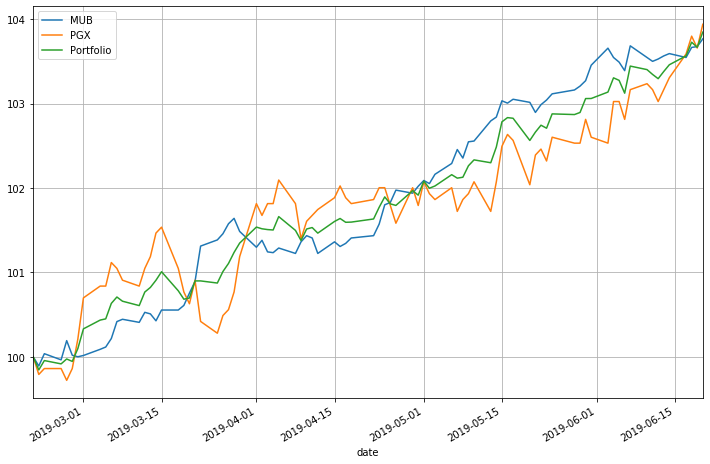

In [18]:
%pylab inline
quote.graph(21, {'MUB': 0.53777478, 'PGX': 0.46222522})